In [1]:
import os
import urllib
import zipfile
import re

import numpy as np
import pandas as pd
import geopandas as gpd
import pysal as ps
import libpysal as lps

import matplotlib.pyplot as plt
import matplotlib.collections as mplc
%matplotlib inline
import seaborn as sns
import shapely
from pysal.lib.cg import shapely_ext
from shapely import geometry as sgeom
from shapely.geometry import Point
import descartes as des
import pointpats 
from pointpats import PointPattern
from shapely import ops
from pointpats import PoissonPointProcess as ppp_csr
from pointpats import window
from pointpats.window import poly_from_bbox, as_window, Window, to_ccf
import pointpats.quadrat_statistics as qs

import warnings
warnings.simplefilter('ignore') 

<AxesSubplot:>

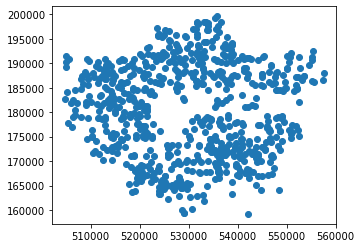

In [2]:
#affordable housing data [.csv] 
url = 'https://data.london.gov.uk/download/dclg-affordable-housing-supply-borough/9d975263-dc3a-45c9-9236-dcc15d9e55d2/dclg-affordable-housing-borough.csv'
path = os.path.join("data", "affordable_housing_london.csv")

r = urllib.request.urlretrieve(url, path) 

#allotment locations [.shp] 
url = 'https://data.london.gov.uk/download/allotment-locations/7f0af12b-bed3-4387-a2be-0531d1368c10/gla-allotment-locations-shp.zip'
path = os.path.join("data", "allotment_loc")

r = urllib.request.urlretrieve(url, path)

z = zipfile.ZipFile(path)
m = z.extractall("data")
allotments = gpd.read_file('data/gla-allotment-locations.shp')
allotments.plot()

In [3]:
f = ps.lib.io.open('data/gla-allotment-locations.shp')
#polys = [shp for shp in allotments] 
#boundary = shapely_ext.cascaded_union(polys)

In [4]:
pp_allotments = PointPattern(np.asarray([pnt for pnt in f]))
f.close()

pp_allotments.summary()

Point Pattern
741 points
Bounding rectangle [(504818.4229005856,159230.15009888785), (557515.8734419117,199577.20087573995)]
Area of window: 2126186712.8015366
Intensity estimate for window: 3.485112551680059e-07
               x              y
0  535942.959648  167853.561673
1  536249.906783  167898.018947
2  536251.695961  167397.022356
3  536291.956594  169784.328997
4  535658.142257  169028.575329


In [5]:
pp_allotments.window.area

2126186712.8015366

In [6]:
pp_allotments.window.centroid

(531167.1481712499, 179403.6754873143)

In [7]:
pp_allotments.window.bbox

[504818.4229005856, 159230.15009888785, 557515.8734419117, 199577.20087573995]

In [8]:
pp_allotments.window.contains_point((51.4986662, -0.0872523))

False

In [9]:
pp_allotments.window.parts

[[(504818.4229005856, 159230.15009888785),
  (504818.4229005856, 199577.20087573995),
  (557515.8734419117, 199577.20087573995),
  (557515.8734419117, 159230.15009888785),
  (504818.4229005856, 159230.15009888785)]]

In [10]:
pp_allotments.points

,x,y
0,535942.959648,167853.561673
1,536249.906783,167898.018947
2,536251.695961,167397.022356
3,536291.956594,169784.328997
4,535658.142257,169028.575329
...,...,...
736,535745.803747,182582.435577
737,534201.907811,173276.799287
738,533314.277513,175897.379154
739,538522.773306,183046.412765


In [11]:
pp_allotments.lambda_mbb

3.4851125516800617e-07

In [12]:
pp_allotments.lambda_hull

4.7022115937331125e-07

In [13]:
allotments = ps.lib.io.open('data/gla-allotment-locations.shp')
points = [shp for shp in allotments]

In [14]:
lsoas = ps.lib.io.open('/Users/zahrajasmin-uddin/Desktop/coding/principles-sds/data/LSOA_IMD/LSOA_IMD2019.shp')
polys = [shp for shp in lsoas]
boundary = shapely_ext.cascaded_union(polys)

In [16]:
type(boundary)

pysal.lib.cg.shapes.Polygon

In [17]:
print(len(polys))
print(len(points))

4835
741


In [18]:
w = as_window(boundary)
w.holes

[[(528860.8769998448, 177929.0149999783),
  (528777.882353664, 177935.55477050968),
  (528860.8769999391, 177929.01500012836),
  (528950.4129979915, 177922.53600022622),
  (528950.4130000735, 177922.5359999002),
  (528994.1145508632, 177913.64340856383),
  (528950.4129999581, 177922.53599980427),
  (528860.8769998448, 177929.0149999783)],
 [(524363.869902898, 171697.71995711746),
  (524376.4289998942, 171702.017999616),
  (524376.4289999151, 171702.0179998679),
  (524363.869902898, 171697.71995711746)],
 [(524376.4289999151, 171702.0179998679),
  (524370.034838875, 171866.7146205932),
  (524376.4290002993, 171702.01799989495),
  (524376.4290003055, 171702.01799975676),
  (524376.428999926, 171702.01799962684),
  (524376.4289999151, 171702.0179998679)],
 [(545061.8359999012, 180089.0480000283),
  (545047.1204148597, 180095.18784342147),
  (545061.835999927, 180089.0480000699),
  (545061.8359999012, 180089.0480000283)],
 [(545061.835999927, 180089.0480000699),
  (545063.0264670962, 18010

In [19]:
len(w.parts)

10

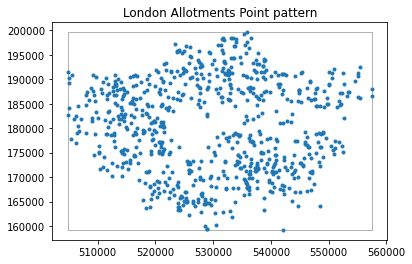

In [20]:
pp_allotments.plot(window=True, title= "London Allotments Point pattern")

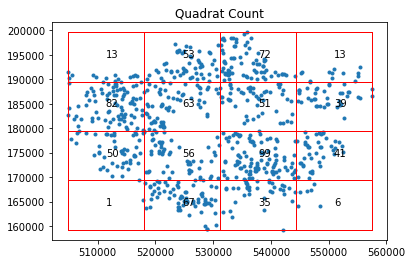

In [21]:
q_r_allotments = qs.QStatistic(pp_allotments, shape = 'rectangle', nx = 4, ny = 4)
q_r_allotments.plot()

In [22]:
print('Chi-squared test statistic for the observed point pattern is: '+ str(q_r_allotments.chi2))
print('Degree of freedom is: '+str(q_r_allotments.df))
print('P-value for Chi-squared test statistic is: '+str.format('{0:.6f}', q_r_allotments.chi2_pvalue))

Chi-squared test statistic for the observed point pattern is: 252.57624831309042
Degree of freedom is: 15
P-value for Chi-squared test statistic is: 0.000000


can reject hypothesis of CSR due to p-value <0.05 

In [23]:
q_h_allotments = qs.QStatistic(pp_allotments, shape = 'hexagon', lh=0.08)
q_h_allotments.plot()

KeyboardInterrupt: 

In [1]:
print('Chi-squared test statistic for the observed point pattern is: '+ str(q_h_allotments.chi2))
print('Degree of freedom is: '+str(q_h_allotments.df))
print('P-value for Chi-squared test statistic is: '+str.format('{0:.6f}', q_h_allotments.chi2_pvalue))

NameError: name 'q_h_allotments' is not defined

In [24]:
ldn_allotments = gpd.read_file('data/gla-allotment-locations.shp')

In [25]:
from scipy import ndimage
def heatmap(d, bins=(50,50), smoothing=2, cmap='jet'):
    def getx(pt):
        return pt.coords[0][0]     

    def gety(pt):
        return pt.coords[0][1]

    x = list(d.geometry.apply(getx)) # get the x value from geometry, replace ???
    y = list(d.geometry.apply(gety)) # get the y value from geometry, replace ???
    heatmap, xedges, yedges = np.histogram2d(y, x, bins=bins) # call numpy's 2D histogram function
    extent = [yedges[0], yedges[-1], xedges[-1], xedges[0]]

    logheatmap = np.log(heatmap)
    logheatmap[np.isneginf(logheatmap)] = 0
    logheatmap = ndimage.filters.gaussian_filter(logheatmap, smoothing, mode='nearest') # scipy's ndimage
    
    plt.imshow(logheatmap, cmap=cmap, extent=extent)  # plot the heatmap
    plt.colorbar()
    plt.gca().invert_yaxis()
    plt.show()

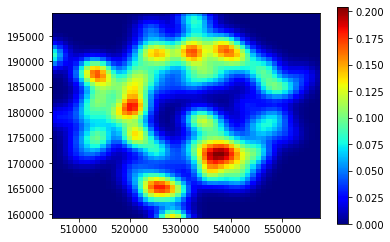

In [26]:
heatmap(ldn_allotments, bins=50, smoothing=2)

In [7]:
ldn_allotments.head()

,GLA_ID,REF,NAME,LOCATION,SUPPLIEDPO,NEARESTPOS,BOROUGH,ORGANISATI,FACILITIES,GRADE,COMMENTS,EASTING,NORTHING,LATITUDE,LONGITUDE,geometry
0,126,0,Abbots Way,Alongside railway line,BR3 3,CR0 7TX,Bromley,None,None,None,None,535943,167854,-0.047422,51.393386,POINT (535942.960 167853.562)
1,127,0,Adams Road,Alongside railway line at junction with Upper ...,BR3,BR3 4AX,Bromley,None,None,None,None,536250,167898,-0.042996,51.393712,POINT (536249.907 167898.019)
2,128,0,Aylesford Avenue,To north of Greenview Avenue,BR3 3,CR0 7QW,Croydon,None,None,None,None,536252,167397,-0.043162,51.389209,POINT (536251.696 167397.022)
3,129,0,Barnmead Road,Between Railway tracks north of Thayers Farm Road,BR3 1,BR3 4LY,Bromley,None,None,None,None,536292,169784,-0.041668,51.410653,POINT (536291.957 169784.329)
4,130,0,Beck Lane,North of Beck Lane and Central Terrace,BR3 4,BR3 4RF,Bromley,None,None,None,None,535658,169029,-0.051065,51.404014,POINT (535658.142 169028.575)


In [27]:
lsoas_gdf= gpd.read_file('/Users/zahrajasmin-uddin/Desktop/coding/principles-sds/data/LSOA_IMD/LSOA_IMD2019.shp')
lsoas_gdf.head()

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,...,IMD2019_Cr,IMD2019_14,IMD2019_15,IMD2019_Ba,IMD2019_16,IMD2019_17,IMD2019_Li,IMD2019_18,IMD2019_19,geometry
0,E01000001,City of London 001A,E02000001,City of London 001,E09000001,City of London,E12000007,London,1465,1465,...,-2.0,32662,10,29.5,7319,3,31.9,7789,3,"POLYGON ((532105.092 182011.230, 532162.491 18..."
1,E01000002,City of London 001B,E02000001,City of London 001,E09000001,City of London,E12000007,London,1436,1436,...,-2.3,32789,10,24.4,11707,4,23.1,13070,4,"POLYGON ((532746.813 181786.891, 532671.688 18..."
2,E01000003,City of London 001C,E02000001,City of London 001,E09000001,City of London,E12000007,London,1346,1250,...,-1.0,29363,9,40.1,2157,1,40.5,4092,2,"POLYGON ((532135.145 182198.119, 532158.250 18..."
3,E01000005,City of London 001E,E02000001,City of London 001,E09000001,City of London,E12000007,London,985,985,...,-1.3,31059,10,39.9,2217,1,29.0,9397,3,"POLYGON ((533807.946 180767.770, 533649.063 18..."
4,E01000006,Barking and Dagenham 016A,E02000017,Barking and Dagenham 016,E09000002,Barking and Dagenham,E12000007,London,1703,1699,...,-0.1,18848,6,45.2,1033,1,26.9,10629,4,"POLYGON ((545122.049 184314.931, 545271.917 18..."


In [28]:
lsoas_gdf = lsoas_gdf[['LAD11NM', 'geometry']]
colnames = ['borough', 'geometry']
lsoas_gdf.columns = colnames
lsoas_gdf.head(4)

,borough,geometry
0,City of London,"POLYGON ((532105.092 182011.230, 532162.491 18..."
1,City of London,"POLYGON ((532746.813 181786.891, 532671.688 18..."
2,City of London,"POLYGON ((532135.145 182198.119, 532158.250 18..."
3,City of London,"POLYGON ((533807.946 180767.770, 533649.063 18..."


In [29]:
lsoas_allotments_count = pd.DataFrame(ldn_allotments['BOROUGH'].value_counts().astype(int)).reset_index()
lsoas_allotments_count.columns = ['borough', 'Numbers']
lsoas_allotments_count.head(4)

,borough,Numbers
0,Ealing,57
1,Bromley,51
2,Barnet,51
3,Hillingdon,38


<AxesSubplot:>

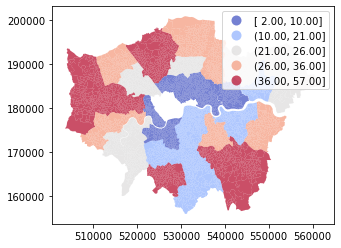

In [30]:
join_gdf = lsoas_gdf.merge(lsoas_allotments_count, on='borough')
join_gdf.to_file(driver='ESRI Shapefile', filename='data/b_allotment_numbers.shp')

join_gdf.plot(column='Numbers', cmap='coolwarm', scheme='quantiles', alpha=0.7, legend=True)

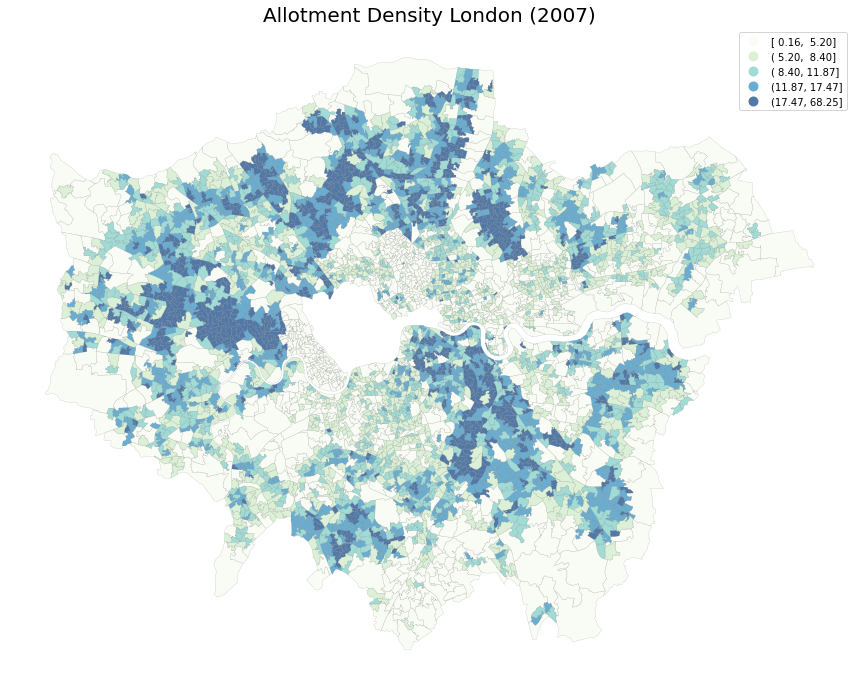

In [31]:
join_gdf['area']=join_gdf.geometry.area

join_gdf['density'] = join_gdf.apply(lambda row: 100000*row.Numbers / row.area, axis=1)
f, ax = plt.subplots(1, figsize=(20,12))
join_gdf.plot(column='density', cmap='GnBu', 
              scheme='quantiles', 
              alpha=0.7, legend=True, ax=ax, edgecolor='grey', linewidth=0.2
             )
plt.title('Allotment Density London (2007)', fontsize=20)
sns.despine()
ax.axis('off')
plt.show()

In [32]:
#b_ah_2007 = b_ah['year']==2007
gdf = gpd.read_file('/Users/zahrajasmin-uddin/Desktop/coding/principles-sds/data/lsoa_IMD_airbnb_housing.shp')

In [33]:
gdf.groupby(['Area'])

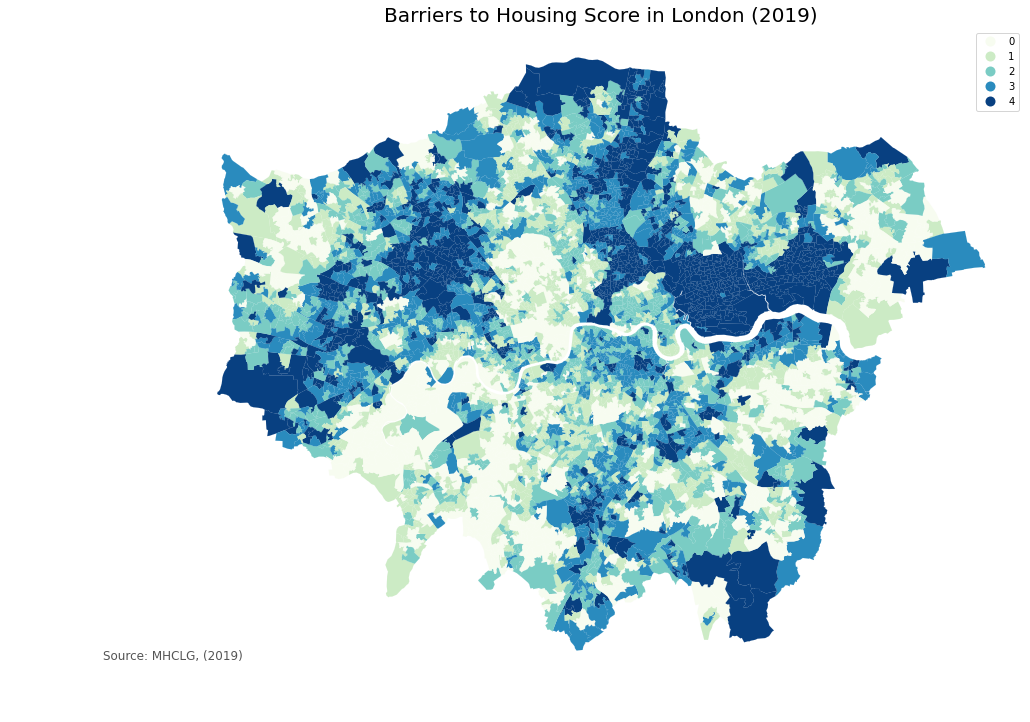

In [34]:
import pysal as ps
from pysal.model.spreg import OLS
from pysal.model.spreg import ML_Error
from pysal.model.spreg import ML_Lag
from pysal.explore import esda 
from pysal.viz.splot.esda import lisa_cluster

pr = ps.viz.mapclassify.Quantiles(gdf['BaHScore'], k=5)
f, ax = plt.subplots(1, figsize=(20,12))
gdf.assign(cl_pr=pr.yb).plot(column='cl_pr', categorical=True, k=5, cmap='GnBu', 
                                      linewidth=0.1, ax=ax, edgecolor='face', legend=True)
plt.title('Barriers to Housing Score in London (2019)', fontsize=20)
sns.despine()
ax.annotate('Source: MHCLG, (2019)', xy=(0.1, 0.1), xycoords='figure fraction', 
           horizontalalignment='left', verticalalignment='top', 
           fontsize=12, color='#555555')
ax.axis('off')
plt.show()

need to do OLS, SA + GWR 

In [35]:
gdf['BaHScore'].count()

4835

In [40]:
gdf.groupby(['Area'])

In [43]:
gdf = gdf[['Area', 'BaHScore']]
colnames = ['borough', 'HScore']
gdf.columns = colnames 
gdf.head()

,borough,HScore
0,City of London 001A,29.5
1,City of London 001B,24.4
2,City of London 001C,40.1
3,City of London 001E,39.9
4,Barking and Dagenham 016A,45.2


In [54]:
b_allotments = gpd.read_file('/Users/zahrajasmin-uddin/Desktop/coding/applications-sds/data/b_allotment_numbers.shp')

In [58]:
b_allotments.head()

,borough,Numbers,geometry
0,Barking and Dagenham,14,"POLYGON ((545122.049 184314.931, 545271.917 18..."
1,Barking and Dagenham,14,"POLYGON ((544180.347 184700.582, 544317.196 18..."
2,Barking and Dagenham,14,"MULTIPOLYGON (((543741.001 184566.000, 543806...."
3,Barking and Dagenham,14,"POLYGON ((544499.837 184704.366, 544630.292 18..."
4,Barking and Dagenham,14,"POLYGON ((544174.000 184361.000, 544211.000 18..."


In [62]:
#gwr_data = gdf.merge(b_allotments, on='borough')
gwr_data = b_allotments.sjoin(gdf)

AttributeError: 'GeoDataFrame' object has no attribute 'sjoin'

,borough,HScore,Numbers,geometry
